In [284]:
# load packages
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot-like style

## Import Data

In [285]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# Let's both datasets at once
data_cleaner = [train_data, test_data]

In [286]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [287]:
train_data[train_data['Age']==56]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [288]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploring some features

In [289]:
list(train_data)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [290]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meyer, Mr. August",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


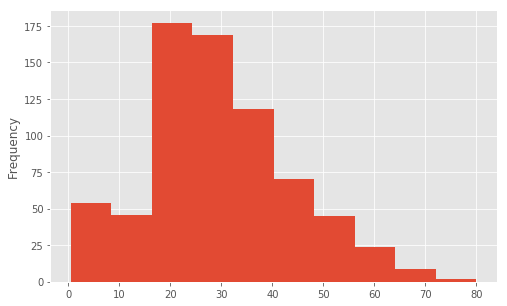

In [291]:
train_data['Age'].plot(kind='hist',figsize=(8, 5))
plt.show()

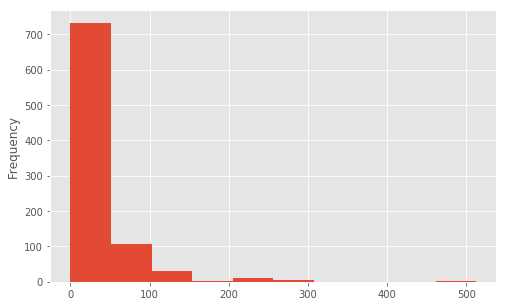

In [292]:
train_data['Fare'].plot(kind='hist',figsize=(8, 5))
plt.show()

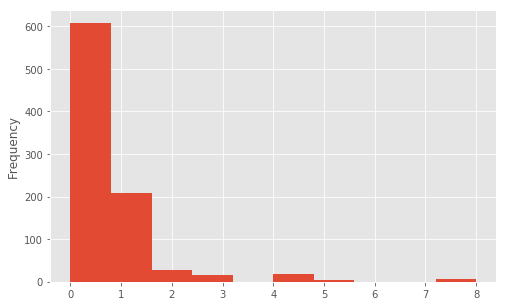

In [293]:
train_data['SibSp'].plot(kind='hist',figsize=(8, 5))
plt.show()

## Deal with missing data

Seems like the Age column has 177 missing data, a 177/891 percent. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. 

A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. For this dataset, age will be imputed with the median (as they are not normal distribution it is better to use median than mean), the cabin attribute will be used, and embark will be imputed with mode. 

In [294]:
# Find out what columns in train data have null variable
print('Train data columns with null values:\n', train_data.isnull().sum())
print("-"*10)

Train data columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


In [295]:
# Find out what columns in test data have null variable
print('Test data columns with null values:\n', test_data.isnull().sum())
print("-"*10)

Test data columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [296]:
## Replace missing age data with age median
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)

In [297]:
## Replace missing Embarked data with the most frequent Embarked data
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

## Convert String Variable to Categorical Variable


In [298]:
# Convert sex string variable to Binary Variable
train_data['Sex'] = train_data['Sex'].apply(lambda g : +1 if g=='female' else 0) # convert male to +1 and female to -1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [299]:
# Convert Embarked string variable to Categorical Variable
train_data['Embarked'] = train_data['Embarked'].apply(lambda g : 0 if g=='S' else (1 if g=='C' else 2)) # convert male to +1 and female to -1
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


## Explore the association between age and survived

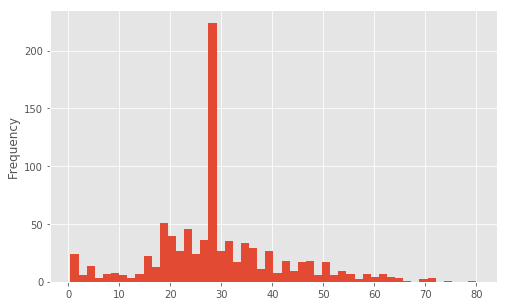

In [300]:
train_data['Age'].plot(kind='hist',figsize=(8, 5),bins=50)

We can tell there are five significant age groups from the histogram above: 0-10, 11-20, 21-35, 36-50, 51 and above

In [301]:
association_age_survived=train_data[['Age','Survived']]
association_age_survived.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


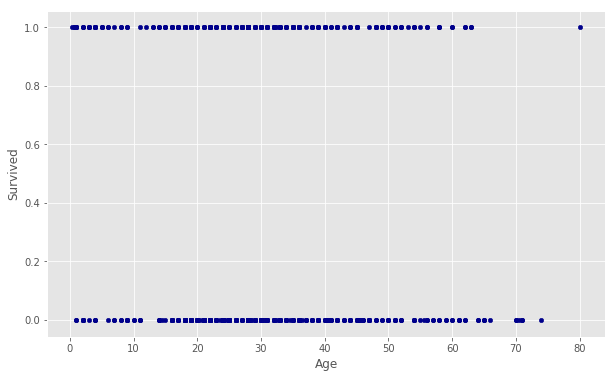

In [302]:
association_age_survived.plot(kind='scatter', x='Age', y='Survived', figsize=(10, 6), color='darkblue')

Didn't see a significant associaiton between age and survived

In [303]:
# Replace age with ordinals based on the five agroups
train_data.loc[ train_data['Age'] <= 10, 'Age'] = 0
train_data.loc[(train_data['Age'] > 10) & (train_data['Age'] <= 20), 'Age'] = 1
train_data.loc[(train_data['Age'] > 20) & (train_data['Age'] <=35), 'Age'] = 2
train_data.loc[(train_data['Age'] > 35) & (train_data['Age'] <= 50), 'Age'] = 3
train_data.loc[ train_data['Age'] > 50, 'Age']=4

In [304]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0


## Exploring the target column

In [305]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

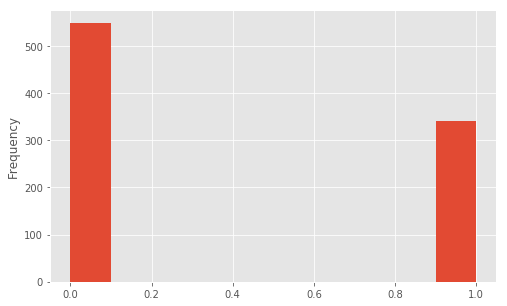

In [306]:
train_data['Survived'].plot(kind='hist',figsize=(8, 5),bins=10) # bins=10 means 10 bins; rwidth adjusts the width of bars to leave spaces between bars
plt.show()

In [307]:
train_data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

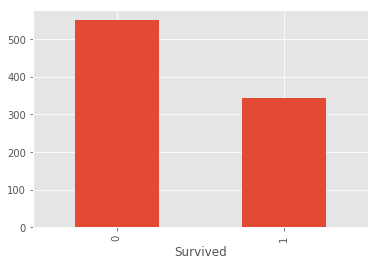

In [308]:
# Plot for a categorical column
train_data.groupby('Survived').size().plot(kind='bar')
plt.show()

It looks like most passengers didn't survive

## Features for the classification algorithm

In [309]:
# The initial features include variables as below
features = ['Pclass',
             'Sex',
             'Age',
             'SibSp',
             'Parch',
             'Fare',
             'Embarked'
           ]
target = 'Survived'

In [310]:
# Extract the feature columns and target column
train_data = train_data[features + [target]]

In [311]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,2.0,1,0,7.2500,0,0
1,1,1,3.0,1,0,71.2833,1,1
2,3,1,2.0,0,0,7.9250,0,1
3,1,1,2.0,1,0,53.1000,0,1
4,3,0,2.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,13.0000,0,0
887,1,1,1.0,0,0,30.0000,0,1
888,3,1,2.0,1,2,23.4500,0,0
889,1,0,2.0,0,0,30.0000,1,1


# Use logistic regression to build a classifier


In [312]:
train_data[features]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2.0,1,0,7.2500,0
1,1,1,3.0,1,0,71.2833,1
2,3,1,2.0,0,0,7.9250,0
3,1,1,2.0,1,0,53.1000,0
4,3,0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,13.0000,0
887,1,1,1.0,0,0,30.0000,0
888,3,1,2.0,1,2,23.4500,0
889,1,0,2.0,0,0,30.0000,1


In [313]:
#Step 1. Import the model I want to use
from sklearn.linear_model import LogisticRegression

#Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

#Step 3. Training the model on the data, storing the information learned from the data
features_model = logisticRegr.fit(train_data[features], train_data[target])